============================================================================================

# XGBoost


============================================================================================


In [32]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [102]:
import xgboost as xgb
from bayes_opt import BayesianOptimization
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import os
import re
import time
import random
from matplotlib import pyplot as plt
from sklearn.metrics import log_loss

import fns_models as fns


from subprocess import check_output
print(check_output(['ls', 'data']).decode('utf-8'))

% matplotlib inline

athenaeum_authors_preview.csv
athenaeum_painting_filtered.csv
athenaeum_paintings.csv
athenaeum_paintings_sizes.csv
color_histograms.csv
complete_data.csv
extra_tree_com.csv
grad_boost_com.csv
images
images_athenaeum
images_sizes_2325.csv
net_predicted.csv
painter_info_clean.csv
painting_info_clean.csv
resized_200
rf_com.csv
test_author200.csv
test_data.csv
test_hist_author_knn.csv
test_hist_author_rf.csv
train_author200.csv
train_data.csv
train_hist_author_knn.csv
train_hist_author_rf.csv



In [34]:
train, train_labels, test, test_labels = fns.get_top_author(3)

[INFO] The size of train histogram for Random Forest(49890, 35)
[INFO] The size of test histogram for Random Forest(12473, 35)
24      1369
1793    1338
368     1335
Name: author_id, dtype: int64
[trian above] ==================================================[test below]
24      342
1793    335
368     334
Name: author_id, dtype: int64
(4042,)
(4042, 35)


In [24]:
# train = train.sample(20)
# train_labels = train_labels.sample(20)
# test = test.sample(15)
# test_labels = test_labels.sample(15)

================================================================================================================

# Bayesian Optimization

[bayesian-optimization](https://scikit-optimize.github.io/notebooks/bayesian-optimization.html)

================================================================================================================

In [35]:
"""
Baysian hyperparameter optimization [https://github.com/fmfn/BayesianOptimization]
for Mean Absoulte Error objective
on default features for https://www.kaggle.com/c/allstate-claims-severity
"""


import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from bayes_opt import BayesianOptimization
from tqdm import tqdm


def xgb_evaluate(min_child_weight,
                 colsample_bytree,
                 max_depth,
                 subsample,
                 gamma,
                 alpha):

    params['min_child_weight'] = int(min_child_weight)
    params['cosample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['max_depth'] = int(max_depth)
    params['subsample'] = max(min(subsample, 1), 0)
    params['gamma'] = max(gamma, 0)
    params['alpha'] = max(alpha, 0)


    cv_result = xgb.cv(params, xgtrain, num_boost_round=num_rounds, nfold=5,
             seed=random_state,
             callbacks=[xgb.callback.early_stop(50)])

    return -cv_result['test-mae-mean'].values[-1]


def prepare_data(train, train_labels):
    train = train
    categorical_columns = train.select_dtypes(include=['object']).columns

    for column in tqdm(categorical_columns):
        le = LabelEncoder()
        train[column] = le.fit_transform(train[column])

    y = train_labels

    X = train
    xgtrain = xgb.DMatrix(X, label=y)

    return xgtrain


if __name__ == '__main__':
    xgtrain = prepare_data(train, train_labels)
    
    num_rounds = 3000
    random_state = 2016
    num_iter = 25
    init_points = 5
    params = {
        'eta': 0.1,
        'silent': 1,
        'eval_metric': 'mae',
        'verbose_eval': True,
        'seed': random_state
    }

    xgbBO = BayesianOptimization(xgb_evaluate, {'min_child_weight': (1, 20),
                                                'colsample_bytree': (0.1, 1),
                                                'max_depth': (5, 15),
                                                'subsample': (0.5, 1),
                                                'gamma': (0, 10),
                                                'alpha': (0, 10),
                                                })

    xgbBO.maximize(init_points=init_points, n_iter=num_iter)
    
    print "Best Params %s" % str(xgbBO.res['max'])
    
    # xgtrain.get_label()

0it [00:00, ?it/s]

Initialization
---------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |     alpha |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.


Stopping. Best iteration:
[85]	train-mae:151.908+2.87743	test-mae:438.859+7.19919

    1 | 00m04s | -438.85917 |    1.4948 |             0.4452 |    8.6838 |      8.7511 |            13.5774 |      0.8550 | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[90]	train-mae:51.563+1.75217	test-mae:441.627+11.5227

    2 | 00m08s | -441.62706 |    6.1443 |             0.8798 |    3.3898 |     12.8317 |             9.4319 |      0.9236 | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[58]	train-mae:119.408+3.13666	test-mae:446.453+13.6401

    3 | 00m05s | -446.45323 |    0.8591 |             0.6400 |    4.8179 |     11.8729 |             5.7442 |      0.5517 | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train

In [26]:
dir(xgbBO)

['X',
 'Y',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'bounds',
 'dim',
 'explore',
 'f',
 'gp',
 'i',
 'init',
 'init_points',
 'initialize',
 'initialize_df',
 'initialized',
 'keys',
 'maximize',
 'pbounds',
 'plog',
 'points_to_csv',
 'res',
 'set_bounds',
 'util',
 'verbose',
 'x_init',
 'y_init']

In [95]:
def prepare_model_data(train, train_labels, test, test_labels):
    le = LabelEncoder()
    le.fit(train_labels)
    le.classes_
    train_labels_encd = le.transform(train_labels)
    test_labels_encd = le.transform(test_labels)
    
    xgtrain = xgb.DMatrix(train, label=train_labels_encd)
    xgtest = xgb.DMatrix(test, label=test_labels_encd)
    
    return train_labels_encd, test_labels_encd, xgtrain, xgtest

# train_labels_encd, test_labels_encd, xgtrain, xgtest = prepare_model_data(train, train_labels, test, test_labels)

def get_xgb_score(y_true, y_pred):
    if type(y_true[0] != y_pred[0]):
        y_true = np.array(y_true, dtype=np.int64)
        y_pred = np.array(y_pred, dtype=np.int64)
    return (y_true == y_pred).mean()


def get_transformed_class(y_pred):
    le = LabelEncoder()
    le.fit(train_labels)
    le.classes_
    return [le.inverse_transform(int(x)) for x in y_pred]

In [106]:
train_labels_encd, test_labels_encd, xgtrain, xgtest = prepare_model_data(train, train_labels, test, test_labels)

In [169]:
# Choose the best params from BO results then predict 
best_min_child_weight = 18
best_colsample_bytree = 0.6
best_subsample = 0.75
best_gamma = 2
best_alpha = 0.14
best_max_depth = 10

num_round = 1000

params['objective'] = 'multi:softmax'
params['num_class'] = 3
params['eval_metric'] = "mlogloss"
params['min_child_weight'] = best_min_child_weight
params['colsample_bytree'] = best_colsample_bytree
params['max_depth'] = best_max_depth
params['subsample'] = best_subsample
params['gamma'] = best_gamma
params['alpha'] = best_alpha

best_xgb = xgb.train(params, xgtrain, num_round)
best_xgb.save_model('models/xgb')


best_xgb_pred = best_xgb.predict(xgtrain)

# accuracy for the train set
print "Accuracy of the Model on training set:" + str(get_xgb_score(train_labels_encd, best_xgb_pred))

# accuracy for the test set
print "Accuracy of the Model on testing set:" + str(get_xgb_score(test_labels_encd, best_xgb_pred_test))


# use the best params to predict
xgb_true, xgb_pred = test_labels, best_xgb.predict(xgtest)
xgb_pred

Accuracy of the Model on training set:0.975012370114
Accuracy of the Model on testing set:0.77546983185


array([ 0.,  2.,  2., ...,  2.,  0.,  2.], dtype=float32)

In [173]:
xgb_true, xgb_pred = test_labels, best_xgb.predict(xgtest)
xgb_pred = get_transformed_class(xgb_pred)
xgb_pred


[24,
 1793,
 1793,
 1793,
 1793,
 1793,
 1793,
 1793,
 1793,
 1793,
 1793,
 24,
 1793,
 1793,
 1793,
 1793,
 24,
 24,
 24,
 24,
 24,
 1793,
 1793,
 24,
 368,
 1793,
 24,
 368,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 368,
 24,
 24,
 24,
 1793,
 24,
 24,
 368,
 368,
 24,
 24,
 24,
 1793,
 24,
 368,
 24,
 24,
 24,
 24,
 1793,
 24,
 24,
 368,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 368,
 24,
 24,
 24,
 24,
 1793,
 24,
 1793,
 24,
 24,
 24,
 24,
 24,
 1793,
 24,
 24,
 368,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 1793,
 24,
 24,
 24,
 24,
 24,
 24,
 1793,
 368,
 24,
 24,
 368,
 24,
 368,
 24,
 24,
 24,
 24,
 1793,
 24,
 24,
 24,
 24,
 24,
 1793,
 24,
 1793,
 24,
 24,
 24,
 368,
 24,
 24,
 368,
 368,
 24,
 24,
 24,
 24,
 1793,
 24,
 24,
 24,
 1793,
 24,
 24,
 24,
 24,
 24,
 24,
 1793,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 368,
 24,
 368,
 24,
 1793,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 1793,
 24,
 24,
 24,
 2

In [172]:
get_transformed_class()

{24, 368, 1793}

In [124]:
best_xgb_pred_test = best_xgb.predict(xgtest)

In [125]:
(best_xgb_pred_test == test_labels_encd).mean()

0.77546983184965379

In [148]:
best_xgb_pred

array([ 2.,  2.,  2., ...,  0.,  0.,  0.], dtype=float32)

In [155]:
xgb_pred = [le.inverse_transform(int(x)) for x in xgb_pred]

In [147]:
le.inverse_transform(2)

1793

In [31]:
?xgb.train

In [175]:
xgb_test_df = fns.result_table(xgb_true, xgb_pred)
xgb_test_df = xgb_test_df.rename(index=str, columns={'predictions': 'xgb_pred', 'results': 'xgb_res'})
xgb_test_df

,actual,xgb_pred,xgb_res
33,24,24,True
34,1793,1793,True
35,1793,1793,True
37,1793,1793,True
101,1793,1793,True
102,1793,1793,True
105,1793,1793,True
217,1793,1793,True
261,1793,1793,True
295,1793,1793,True


In [159]:

xgb_test_df.groupby(['actual', 'xgb_pred']).aggregate({'xgb_res': 'count'}).unstack()


xgb_res          
xgb_pred    24   368  1793
actual                    
24           271   38   33
368           43  251   40
1793          36   37  262

In [244]:
# Save and load xgboost model
best_xgb.save_model('models/xgb.model')

bst = xgb.Booster({'nthread':4}) #init model
bst.load_model("models/xgb.model") # load data
bst.predict(xgtest)

array([ 0.,  2.,  2., ...,  2.,  0.,  2.], dtype=float32)

# PCA + XGB

In [178]:
## Get 15 principal components
xgb_pca = PCA(n_components=15)
xgb_pca.fit(train)
xgb_pca_transformed = pd.DataFrame(xgb_pca.transform(train))
xgb_pca_transformed_test = pd.DataFrame(xgb_pca.transform(test))

0.98238212024365967

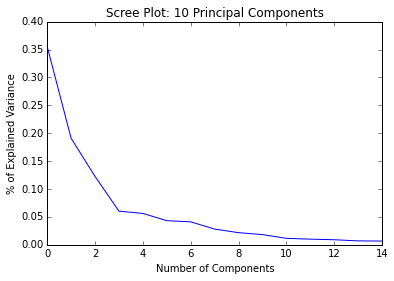

In [179]:
plt.plot(xgb_pca.explained_variance_ratio_)
plt.title("Scree Plot: 10 Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("% of Explained Variance")
sum(xgb_pca.explained_variance_ratio_)

In [180]:
# Run BO for pca of color histogram
if __name__ == '__main__':
    xgtrain = prepare_data(xgb_pca_transformed, train_labels)
    
    num_rounds = 3000
    random_state = 2016
    num_iter = 25
    init_points = 5
    params = {
        'eta': 0.1,
        'silent': 1,
        'eval_metric': 'mae',
        'verbose_eval': True,
        'seed': random_state
    }

    xgbBO = BayesianOptimization(xgb_evaluate, {'min_child_weight': (1, 20),
                                                'colsample_bytree': (0.1, 1),
                                                'max_depth': (5, 15),
                                                'subsample': (0.5, 1),
                                                'gamma': (0, 10),
                                                'alpha': (0, 10),
                                                })

    xgbBO.maximize(init_points=init_points, n_iter=num_iter)
    
    print "Best Params %s" % str(xgbBO.res['max'])
    
    # xgtrain.get_label()

0it [00:00, ?it/s]

Initialization
---------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |     alpha |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.


Stopping. Best iteration:
[46]	train-mae:224.288+3.73704	test-mae:487.254+9.63929

    1 | 00m02s | -487.25399 |    8.9361 |             0.7714 |    4.0923 |     10.2920 |             6.7094 |      0.5110 | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[66]	train-mae:135.613+4.30127	test-mae:481.314+9.11691

    2 | 00m04s | -481.31410 |    0.9600 |             0.2547 |    1.6254 |     13.1474 |            11.7408 |      0.8134 | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
Stopping. Best iteration:
[118]	train-mae:303.96+5.43423	test-mae:493.807+8.85979

    3 | 00m02s | -493.80718 |    9.3435 |             0.9968 |    9.6060 |      5.7120 |             7.1943 |      0.5930 | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will trai

In [182]:
xgbBO.res['max']

{'max_params': {'alpha': 8.4552080256529223,
  'colsample_bytree': 0.49105245763279459,
  'gamma': 1.8325538014822962,
  'max_depth': 12.270173863438597,
  'min_child_weight': 12.78586493371901,
  'subsample': 0.94208992307656025},
 'max_val': -479.8525818}

In [232]:

pca_train_labels_encd, pca_test_labels_encd, pca_xgtrain, pca_xgtest = prepare_model_data(xgb_pca_transformed, \
                                                                                          train_labels, \
                                                                                          xgb_pca_transformed_test, \
                                                                                          test_labels)


# Choose the best params from BO results then predict 
best_min_child_weight = 13
best_colsample_bytree = 0.49
best_subsample = 0.94
best_gamma = 1.8
best_alpha = 8.4
best_max_depth = 12

num_round = 1000

params['objective'] = 'multi:softmax'
params['num_class'] = 3
params['eval_metric'] = "mlogloss"
params['min_child_weight'] = best_min_child_weight
params['colsample_bytree'] = best_colsample_bytree
params['max_depth'] = best_max_depth
params['subsample'] = best_subsample
params['gamma'] = best_gamma
params['alpha'] = best_alpha

pca_best_xgb = xgb.train(params, pca_xgtrain, num_round)
pca_best_xgb.save_model('models/xgb_pca.model')


pca_best_xgb_pred = pca_best_xgb.predict(pca_xgtrain)
# use the best params to predict
pca_xgb_true, pca_xgb_pred_test = test_labels, pca_best_xgb.predict(pca_xgtest)
pca_xgb_pred


# accuracy for the train set
print "Accuracy of the Model on training set:" + str(get_xgb_score(train_labels_encd, pca_best_xgb_pred))

# accuracy for the test set
print "Accuracy of the Model on testing set:" + str(get_xgb_score(test_labels_encd, pca_xgb_pred_test))




Accuracy of the Model on training set:0.79440870856
Accuracy of the Model on testing set:0.71315529179


In [233]:
pca_best_xgb_pred = get_transformed_class(pca_best_xgb_pred)
pca_xgb_pred_test = get_transformed_class(pca_xgb_pred_test)

In [234]:
pca_xgb_test_df = fns.result_table(pca_xgb_true, pca_xgb_pred_test)
pca_xgb_test_df = pca_xgb_test_df.rename(index=str, columns={'predictions': 'xgb_pca_pred', 'results': 'xgb_pca_res'})
pca_xgb_test_df

,actual,xgb_pca_pred,xgb_pca_res
33,24,24,True
34,1793,1793,True
35,1793,1793,True
37,1793,24,False
101,1793,1793,True
102,1793,1793,True
105,1793,1793,True
217,1793,24,False
261,1793,1793,True
295,1793,1793,True


In [235]:
pca_xgb_test_df.groupby(['actual', 'xgb_pca_pred']).aggregate({'xgb_pca_res': 'count'}).unstack()


xgb_pca_res          
xgb_pca_pred        24   368  1793
actual                            
24                   244   46   52
368                   49  232   53
1793                  43   47  245

In [237]:
xgb_com = xgb_test_df.merge(pca_xgb_test_df, how='inner', on='actual')
xgb_com

,actual,xgb_pred,xgb_res,xgb_pca_pred,xgb_pca_res
0,24,24,True,24,True
1,24,24,True,24,True
2,24,24,True,24,True
3,24,24,True,368,False
4,24,24,True,24,True
5,24,24,True,24,True
6,24,24,True,368,False
7,24,24,True,24,True
8,24,24,True,1793,False
9,24,24,True,24,True


In [238]:
xgb_com.to_csv('data/xgb_com.csv', index=False)


In [246]:
# Save and load xgboost model
pca_best_xgb.save_model('models/xgb_pca.model')

bst_pca = xgb.Booster({'nthread':4}) #init model
bst_pca.load_model("models/xgb_pca.model") # load data
bst_pca.predict(xgtest)

array([ 0.,  2.,  1., ...,  0.,  0.,  1.], dtype=float32)

In [7]:

def xgb_evaluate(min_child_weight,
                 colsample_bytree,
                 max_depth,
                 subsample,
                 gamma,
                 alpha):
    params = {}
    params['min_child_weight'] = int(min_child_weight)
    params['cosample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['max_depth'] = int(max_depth)
    params['subsample'] = max(min(subsample, 1), 0)
    params['gamma'] = max(gamma, 0)
    params['alpha'] = max(alpha, 0)

    num_rounds = 3000
    random_state = 2017
    
    random_state = 2017
    
    cv_result = cross_val_score(
        xgb(
                 seed=random_state,
                 min_child_weight = int(min_child_weight),
                 cosample_bytree = max(min(colsample_bytree, 1), 0),
                 max_depth = int(max_depth),
                 subsample = max(min(subsample, 1), 0),
                 gamma = max(gamma, 0),
                 alpha = max(alpha, 0)        
             ),
        train, train_labels, 'f1', cv=5
    ).mean()
    return cv_result


def xgb_pca_evaluate(min_child_weight,
                 colsample_bytree,
                 max_depth,
                 subsample,
                 gamma,
                 alpha):

#     params['min_child_weight'] = int(min_child_weight)
#     params['cosample_bytree'] = max(min(colsample_bytree, 1), 0)
#     params['max_depth'] = int(max_depth)
#     params['subsample'] = max(min(subsample, 1), 0)
#     params['gamma'] = max(gamma, 0)
#     params['alpha'] = max(alpha, 0)
    

    random_state = 2017
    
    cv_result = cross_val_score(
        xgb(
                 seed=random_state,
                 min_child_weight = int(min_child_weight),
                 cosample_bytree = max(min(colsample_bytree, 1), 0),
                 max_depth = int(max_depth),
                 subsample = max(min(subsample, 1), 0),
                 gamma = max(gamma, 0),
                 alpha = max(alpha, 0)        
             ),
        pca_transformed, train_labels, 'f1', cv=5
    ).mean()
    return cv_result


In [8]:

def xgb_bo(xgb_fn = xgb_evaluate):
    start_time = time.time()
    
    
    random_state = 2017
    num_iter = 25
    init_points = 5
#     params = {
#         'eta': 0.1,
#         'silent': 1,
#         'eval_metric': 'mae',
#         'verbose_eval': True,
#         'seed': random_state
#     }

    xgbBO = BayesianOptimization(xgb_fn, {'min_child_weight': (1, 20),
                                                'colsample_bytree': (0.1, 1),
                                                'max_depth': (5, 15),
                                                'subsample': (0.5, 1),
                                                'gamma': (0, 10),
                                                'alpha': (0, 10),
                                                })

    xgbBO.maximize(init_points=init_points, n_iter=num_iter)
    print('-' * 53)
    print 'Costed time: \n%f' % (time.time() - start_time)

    print('-' * 53)
    print('Final Results')
    print('XGboost: %f' % xgbBO.res['max']['max_val'])
    print('-' * 53)
    print('XGboost: %f' % xgbBO.res['max'])
    fns.plot_bo(xgb_fn, xgbBO)
